In [ ]:
!gdown '10Qa1ZxwM8PyDjc1iBKpqws2GUEgVCaOY'

Downloading...
From: https://drive.google.com/uc?id=10Qa1ZxwM8PyDjc1iBKpqws2GUEgVCaOY
To: /content/WalmertBusinessCaseStudy.txt
100% 23.6M/23.6M [00:00<00:00, 51.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
data = pd.read_csv('WalmertBusinessCaseStudy.txt')
data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

In [ ]:
df = data.copy()

# 1. Defining Problem Statement and Analyzing basic metrics

In [ ]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000

# 2. Missing Value & Outlier Detection

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

no null values in data

# 3. Business Insights based on Non- Graphical and Visual Analysis

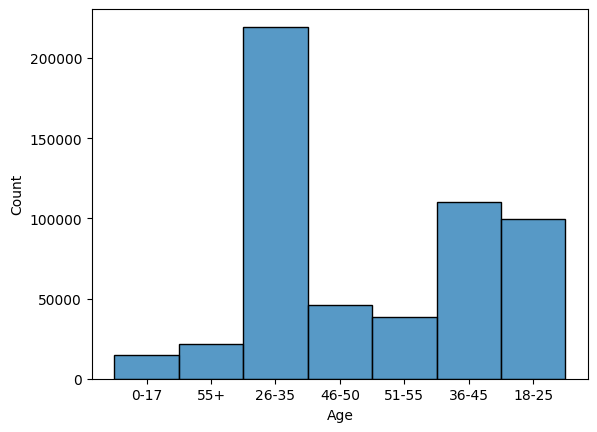

In [ ]:
age = sns.histplot(df['Age'], kde=False)
plt.show()

26-35 age bracket seems to be the highest followed by 36-45 and 18-25 age bracket

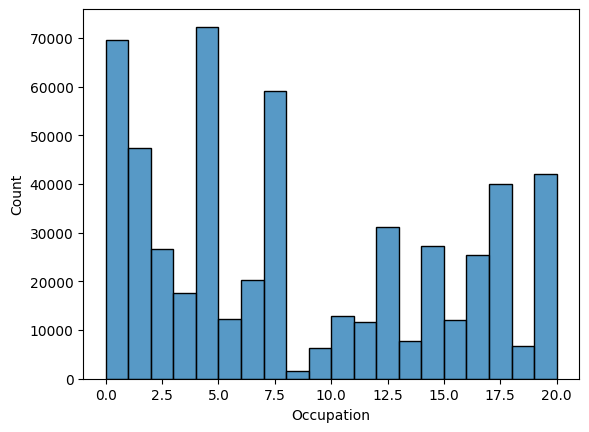

In [ ]:
ocu = sns.histplot(df['Occupation'], kde=False,bins=20)
plt.show()

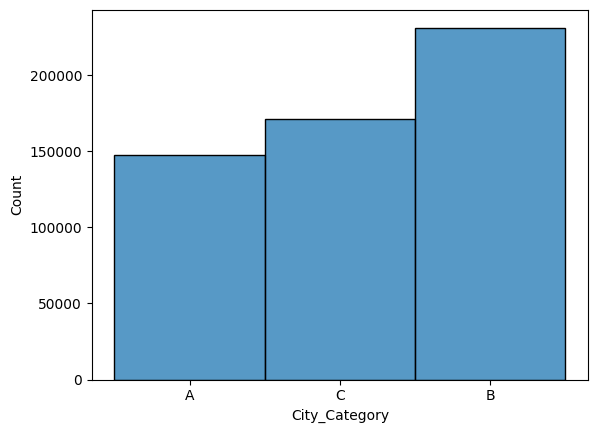

In [ ]:
city_cat = sns.histplot(df['City_Category'], kde=False)
plt.show()

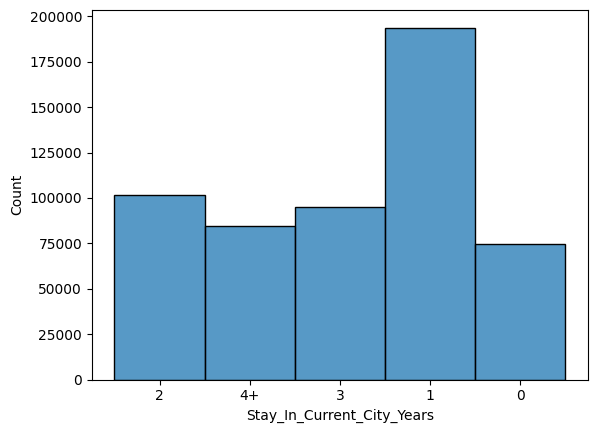

In [ ]:

curr_city = sns.histplot(df['Stay_In_Current_City_Years'], kde=False)
plt.show()

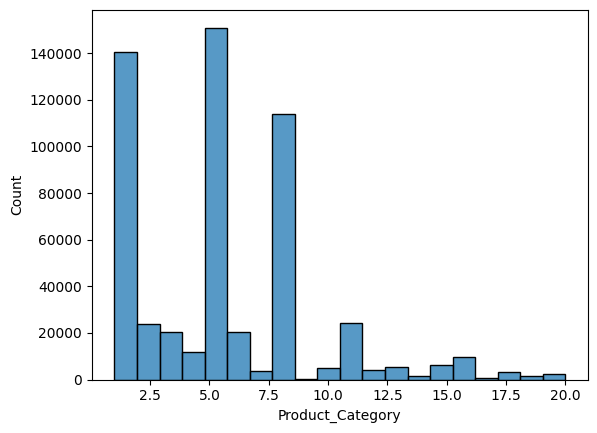

In [ ]:

Product_Category = sns.histplot(df['Product_Category'], kde=False,bins=20)
plt.show()

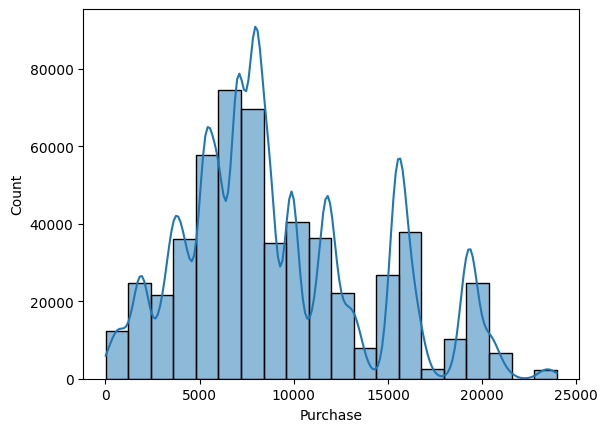

In [ ]:
Purchase = sns.histplot(df['Purchase'], kde=True,bins=20)
plt.show()

most popular purchase amount is around 5000-10000

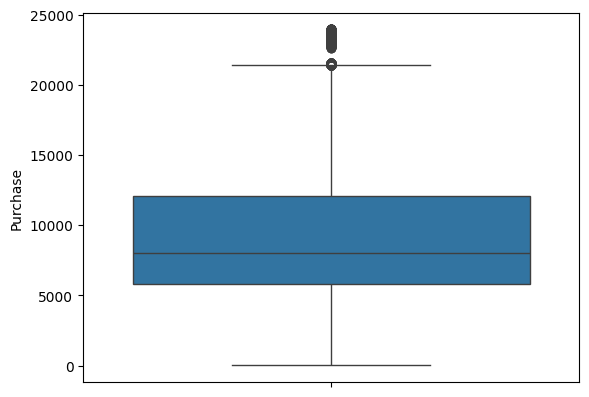

In [ ]:
pur = sns.boxplot(df['Purchase'])
plt.show()

median purchase is around 8000. but there are many outliers. more people purchase for more than 20000

In [ ]:
gender = df.groupby('Gender')['User_ID'].nunique().reset_index()
gender

Gender  User_ID
0      F     1666
1      M     4225

majority of customers are male

# 4. Answering questions and 5. final insights

In [ ]:
#pur_amount = df.groupby(['User_ID','Gender'])['Purchase'].sum().reset_index()
#pur_amount
gender_avg = df.groupby('Gender')['Purchase'].mean().reset_index()
gender_avg

Gender     Purchase
0      F  8734.565765
1      M  9437.526040

average transaction amount for male is 9437.5
average transaction amount for female is 8734.5

In [ ]:
n = df[df['Gender'] == 'F'].shape[0]
n


135809

In [ ]:
n = 1000 #sample size
sample_df = df.sample(n, random_state=42)
sample_df


User_ID Product_ID Gender    Age  Occupation City_Category  \
84432   1001062  P00351342      M  51-55          19             C   
72724   1005172  P00237542      F  36-45          11             B   
197032  1000415  P00116242      F  36-45           0             A   
353704  1000496  P00016742      M  18-25           4             A   
91198   1002010  P00002242      M  18-25           4             B   
...         ...        ...    ...    ...         ...           ...   
349436  1005812  P00269642      F  26-35           7             A   
46400   1001145  P00025642      M  51-55           3             A   
315421  1000641  P00278642      F  36-45           0             A   
471410  1000655  P00291242      F  26-35           2             B   
255123  1003392  P00307442      M  51-55           6             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
84432                           3               0                 1     19142  
72724                           1               0                 1     15513  
197032                          2               1                 8      7802  
353704                          3               0                 1     15455  
91198                           0               0                 6      4492  
...                           ...             ...               ...       ...  
349436                          1               1                11      1726  
46400                           2               1                 4      3456  
315421                          2               1                 5      8734  
471410                          2               0                 8      8125  
255123                          1               1                 5      5203  

[1000 rows x 10 columns]

In [ ]:
n = [500,1000,2000,3000,4000,5000,10000,25000,50000,75000] #sample size
i = 42
ci = [0.90,0.95,0.99]

for j in n:
  for k in ci:
    sample_df = df[df['Gender'] == 'F'].sample(j, random_state=i)
    sample_mean = np.mean(sample_df['Purchase'])
    sample_std = np.std(sample_df['Purchase'], ddof=1)  # Use ddof=1 for sample standard deviation

    standard_error = sample_std / np.sqrt(j)

    confidence_level = k
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    margin_of_error = z_value * standard_error
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    print(f"sample size: {j} , {k*100}% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f}), sample error: {standard_error}")
    i+=1
  print('/n/n')

sample size: 500 , 90.0% Confidence Interval: (8417.50, 9148.60), sample error: 222.23718361911887
sample size: 500 , 95.0% Confidence Interval: (8138.53, 8987.34), sample error: 216.5377690083793
sample size: 500 , 99.0% Confidence Interval: (8548.31, 9679.59), sample error: 219.59455234187496
/n/n
sample size: 1000 , 90.0% Confidence Interval: (8591.57, 9070.63), sample error: 145.62524121895586
sample size: 1000 , 95.0% Confidence Interval: (8342.52, 8911.07), sample error: 145.0415921031752
sample size: 1000 , 99.0% Confidence Interval: (8664.89, 9451.47), sample error: 152.6850406554485
/n/n
sample size: 2000 , 90.0% Confidence Interval: (8444.42, 8786.26), sample error: 103.91366735251586
sample size: 2000 , 95.0% Confidence Interval: (8482.68, 8910.87), sample error: 109.2348800906845
sample size: 2000 , 99.0% Confidence Interval: (8293.03, 8823.95), sample error: 103.0587741868217
/n/n
sample size: 3000 , 90.0% Confidence Interval: (8548.08, 8829.81), sample error: 85.639670809

In [ ]:
n = [500,1000,2000,3000,4000,5000,10000,25000,50000,75000,100000,150000,200000] #sample size
i = 52
ci = [0.90,0.95,0.99]
for j in n:
  for k in ci:
    sample_df = df[df['Gender'] == 'M'].sample(j, random_state=i)
    sample_mean = np.mean(sample_df['Purchase'])
    sample_std = np.std(sample_df['Purchase'], ddof=1)  # Use ddof=1 for sample standard deviation

    standard_error = sample_std / np.sqrt(j)

    confidence_level = k
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    margin_of_error = z_value * standard_error
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    print(f"sample size: {j} , {k*100}% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f}), sample error: {standard_error}")
    i+=1
  print('/n/n')

sample size: 500 , 90.0% Confidence Interval: (8931.64, 9673.74), sample error: 225.58151156962325
sample size: 500 , 95.0% Confidence Interval: (8928.29, 9802.98), sample error: 223.13942140684048
sample size: 500 , 99.0% Confidence Interval: (8833.41, 10013.38), sample error: 229.04738913007196
/n/n
sample size: 1000 , 90.0% Confidence Interval: (9169.14, 9695.59), sample error: 160.028476187727
sample size: 1000 , 95.0% Confidence Interval: (9101.96, 9745.83), sample error: 164.25364169718046
sample size: 1000 , 99.0% Confidence Interval: (9249.77, 10062.37), sample error: 157.73497027773993
/n/n
sample size: 2000 , 90.0% Confidence Interval: (9172.03, 9545.52), sample error: 113.53431097000413
sample size: 2000 , 95.0% Confidence Interval: (9179.23, 9628.60), sample error: 114.63885555565541
sample size: 2000 , 99.0% Confidence Interval: (9107.28, 9696.66), sample error: 114.40648274071746
/n/n
sample size: 3000 , 90.0% Confidence Interval: (9361.78, 9668.39), sample error: 93.2044

# confidence interval for mean purchase amount for male and female customers

*   for small sample sizes, the confidence interval for mean is high.
As the sample size increases, the interval shortens.
There may be sampling bias here because the samples may contain data predominently from one user.

*   The effect of increasing the sample size reduces after a certain point (after 4000 samples here). There is no considerable improvement in the confidence interval.

*   As the sample size increases, there is very little difference between each confidence interval. so for large sample sizes, the confidence interval value has less impact.

*   The confidence interval of mean for male and female does not overlap



In [ ]:
def compute_confidence_interval(sample_df, confidence):
    sample_mean = np.mean(sample_df)
    sample_std = np.std(sample_df, ddof=1)  # Use ddof=1 for sample standard deviation
    n = len(sample_df)
    standard_error = sample_std / np.sqrt(n)
    z_value = stats.norm.ppf(1 - (1 - confidence) / 2)  # Z-value for the confidence level
    margin_of_error = z_value * standard_error
    return sample_mean - margin_of_error, sample_mean + margin_of_error



In [ ]:
def plot_conf_int(col= '',val= []):
  for v in val:
    if col == 'Gender':
      if v == 'F':
        param = 'Female'
      else:
        param = 'Male'
    elif col == 'Marital_Status':
      if v == 0:
        param = 'Single'
      else:
        param = 'Married'
    elif col == 'Age':
        param = v
    population = df[df[col]== v]['Purchase']

    #population = df[df[col]== val]['Purchase']
    sample_sizes = [500,1000,2000,3000,4000,5000,10000,25000,50000,75000,100000,150000,200000]  # Different sample sizes
    confidence_levels = [0.90, 0.95, 0.99]  # Confidence levels

    plt.figure(figsize=(10, 6))

    for i, sample_size in enumerate(sample_sizes):
        sample_indices = np.random.choice(population.index, size=sample_size)
        sample = population.loc[sample_indices]
        for j, confidence in enumerate(confidence_levels):
            interval = compute_confidence_interval(sample, confidence)
            plt.plot([i + j * 0.3, i + j * 0.3], interval, label=f'Size={sample_size}, {int(confidence * 100)}% CI', marker='o')
            plt.scatter([i + j * 0.3], [np.mean(interval)], color=f'C{j}', zorder=3)  # Mean point

    plt.axhline(np.mean(population), color='red', linestyle='--', label='Population Mean')
    plt.xticks(range(len(sample_sizes)), [f'Size={s}' for s in sample_sizes],rotation=90)
    plt.title(f'Effect of Sample Size and Confidence Level on {param} customers Confidence Intervals')
    plt.ylabel('Mean Value')
    plt.xlabel('Sample Sizes')
    plt.legend(loc='upper right', fontsize='small',bbox_to_anchor=(1.25, 1))
    plt.grid()
    plt.show()

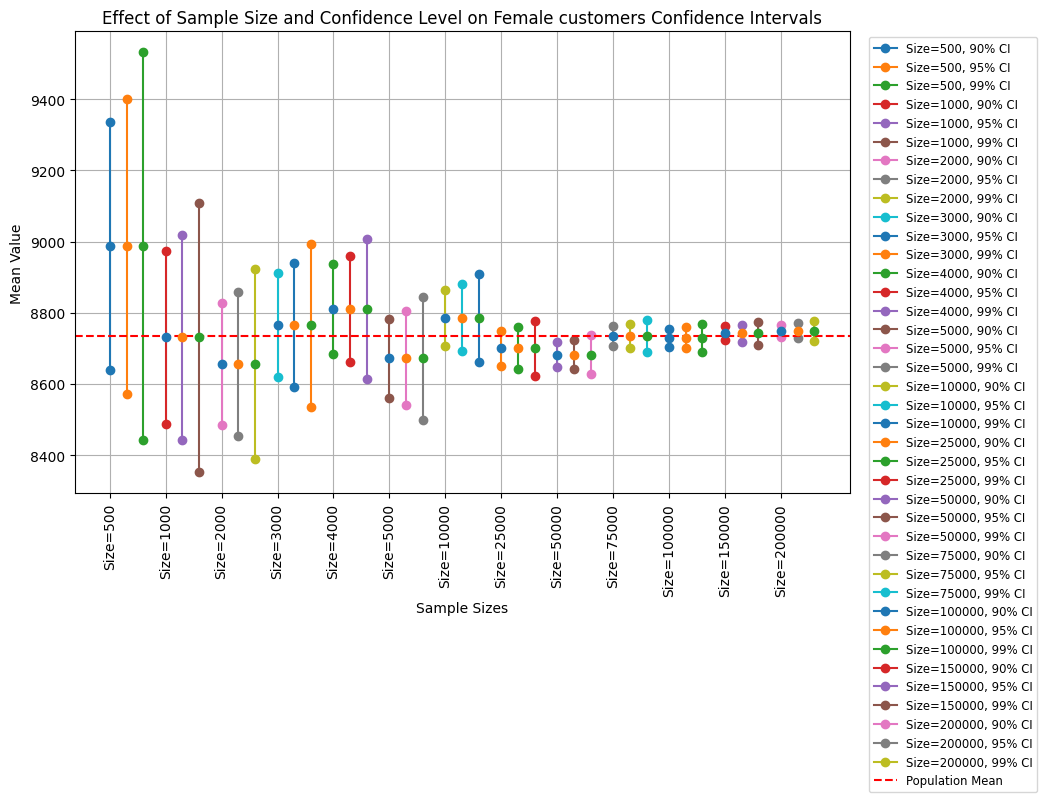

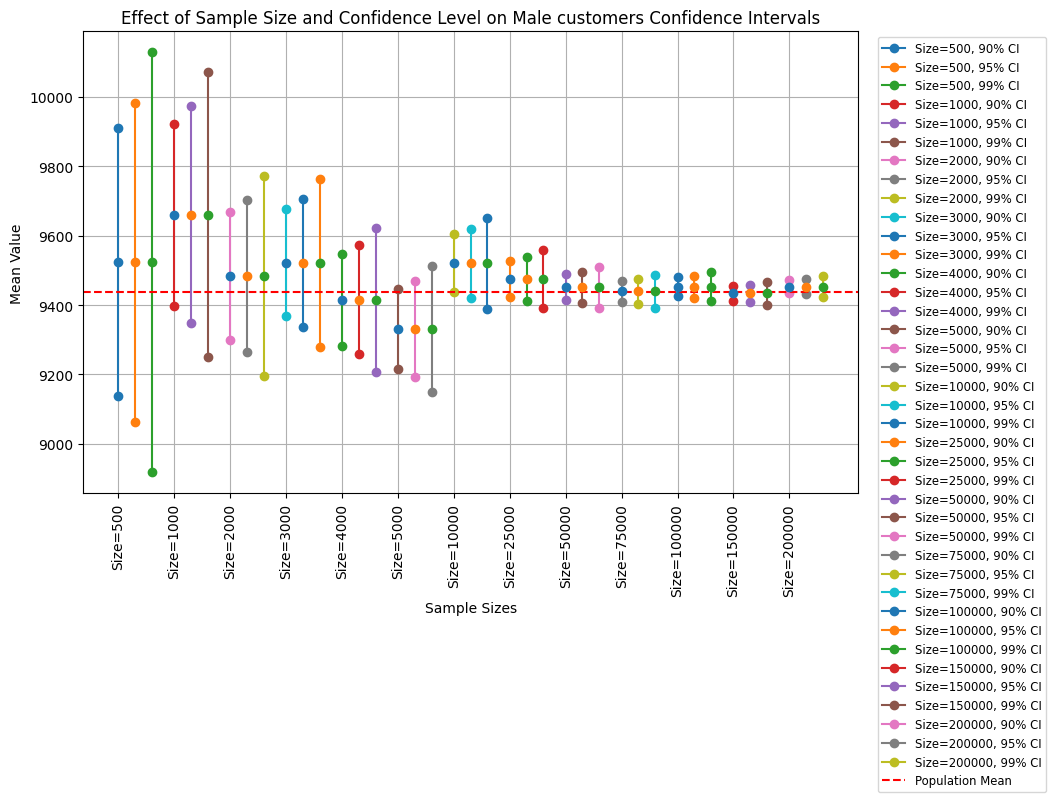

In [ ]:
plot_conf_int('Gender',['F','M'])

In [ ]:
def mean_dist(col= '',val= []):
  for v in val:
    if col == 'Gender':
      if v == 'F':
        param = 'Female'
      else:
        param = 'Male'
    elif col == 'Marital_Status':
      if v == 0:
        param = 'Single'
      else:
        param = 'Married'
    elif col == 'Age':
        param = v
    population = df[df[col]== v]['Purchase']
    #population = df[df[col]== val]['Purchase']

    def sample_means(population, sample_size, num_samples):
        means = []
        for _ in range(num_samples):
            sample_indices = np.random.choice(population.index, size=sample_size)
            sample = population.loc[sample_indices]
            means.append(np.mean(sample))
        return means

    sample_sizes = [500,1000,2000,3000,4000,5000,10000,25000,50000,75000,100000,150000,200000]  # Different sample sizes
    num_samples = 100  # Number of samples to draw for each size

    sample_mean_distributions = {}
    for size in sample_sizes:
        sample_mean_distributions[size] = sample_means(population, sample_size=size, num_samples=num_samples)

    plt.figure(figsize=(20, 12))

    for size, means in sample_mean_distributions.items():
        sns.kdeplot(means, label=f'Sample Size = {size}', fill=False, alpha=0.6)

    plt.axvline(np.mean(population), color='red', linestyle='--', label='Population Mean')
    plt.title(f'Distribution of Sample Means of {param} customers for Different Sample Sizes')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

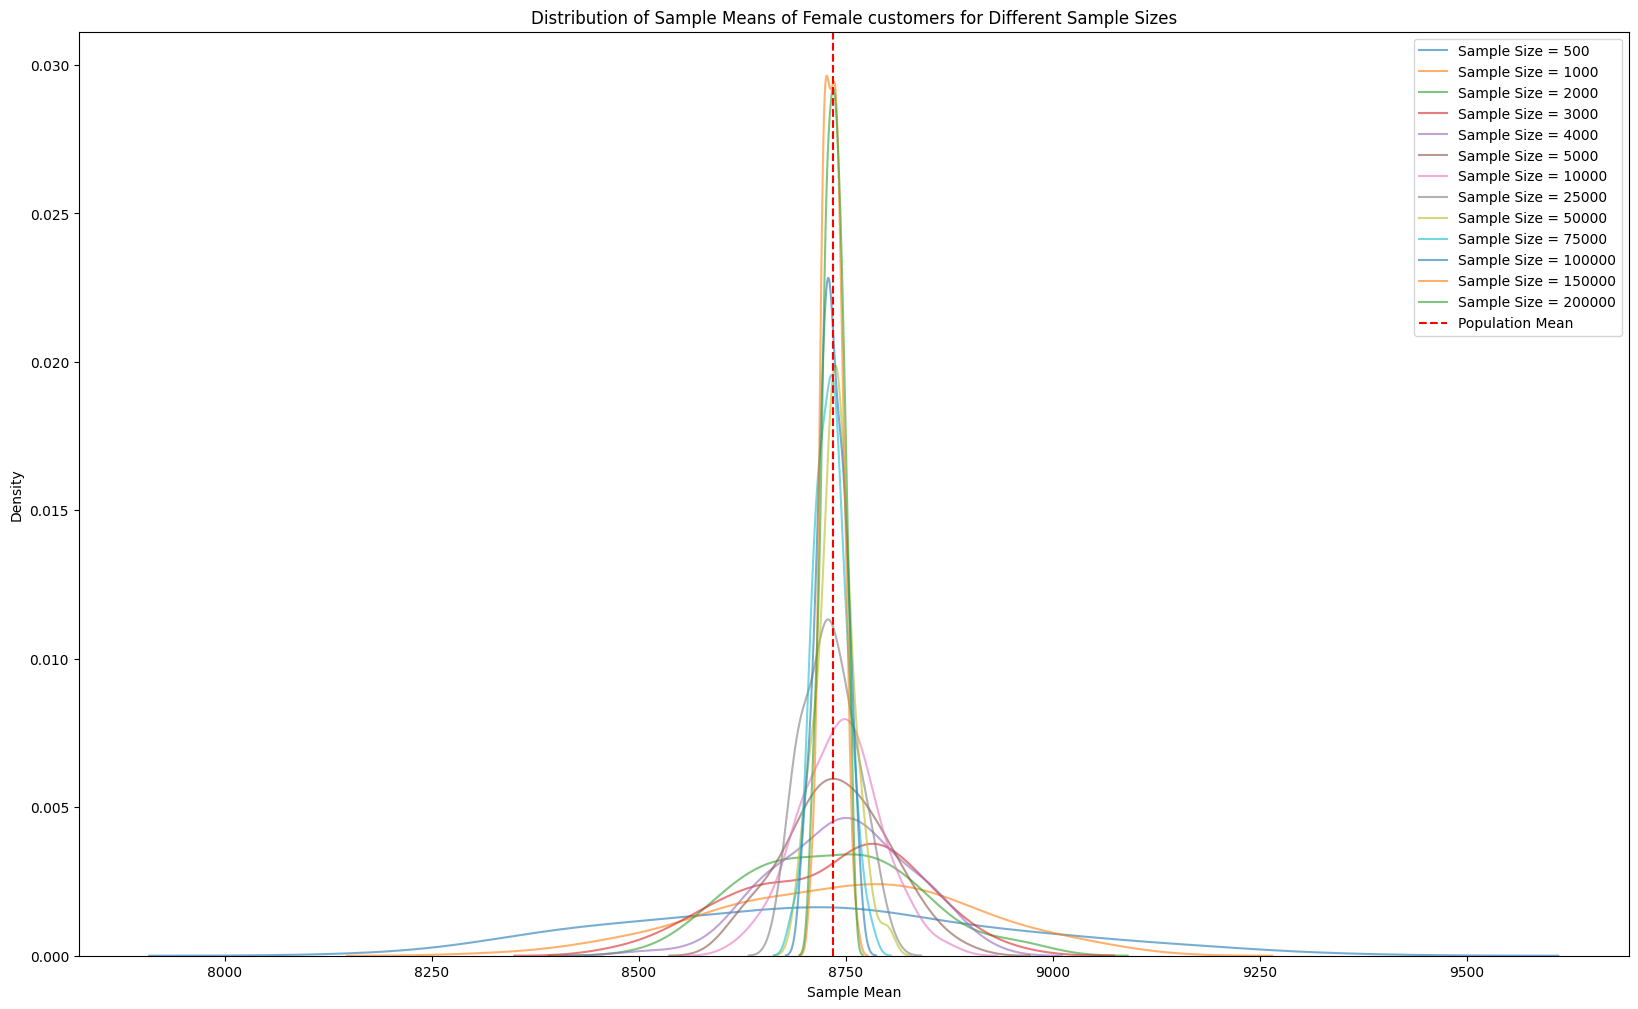

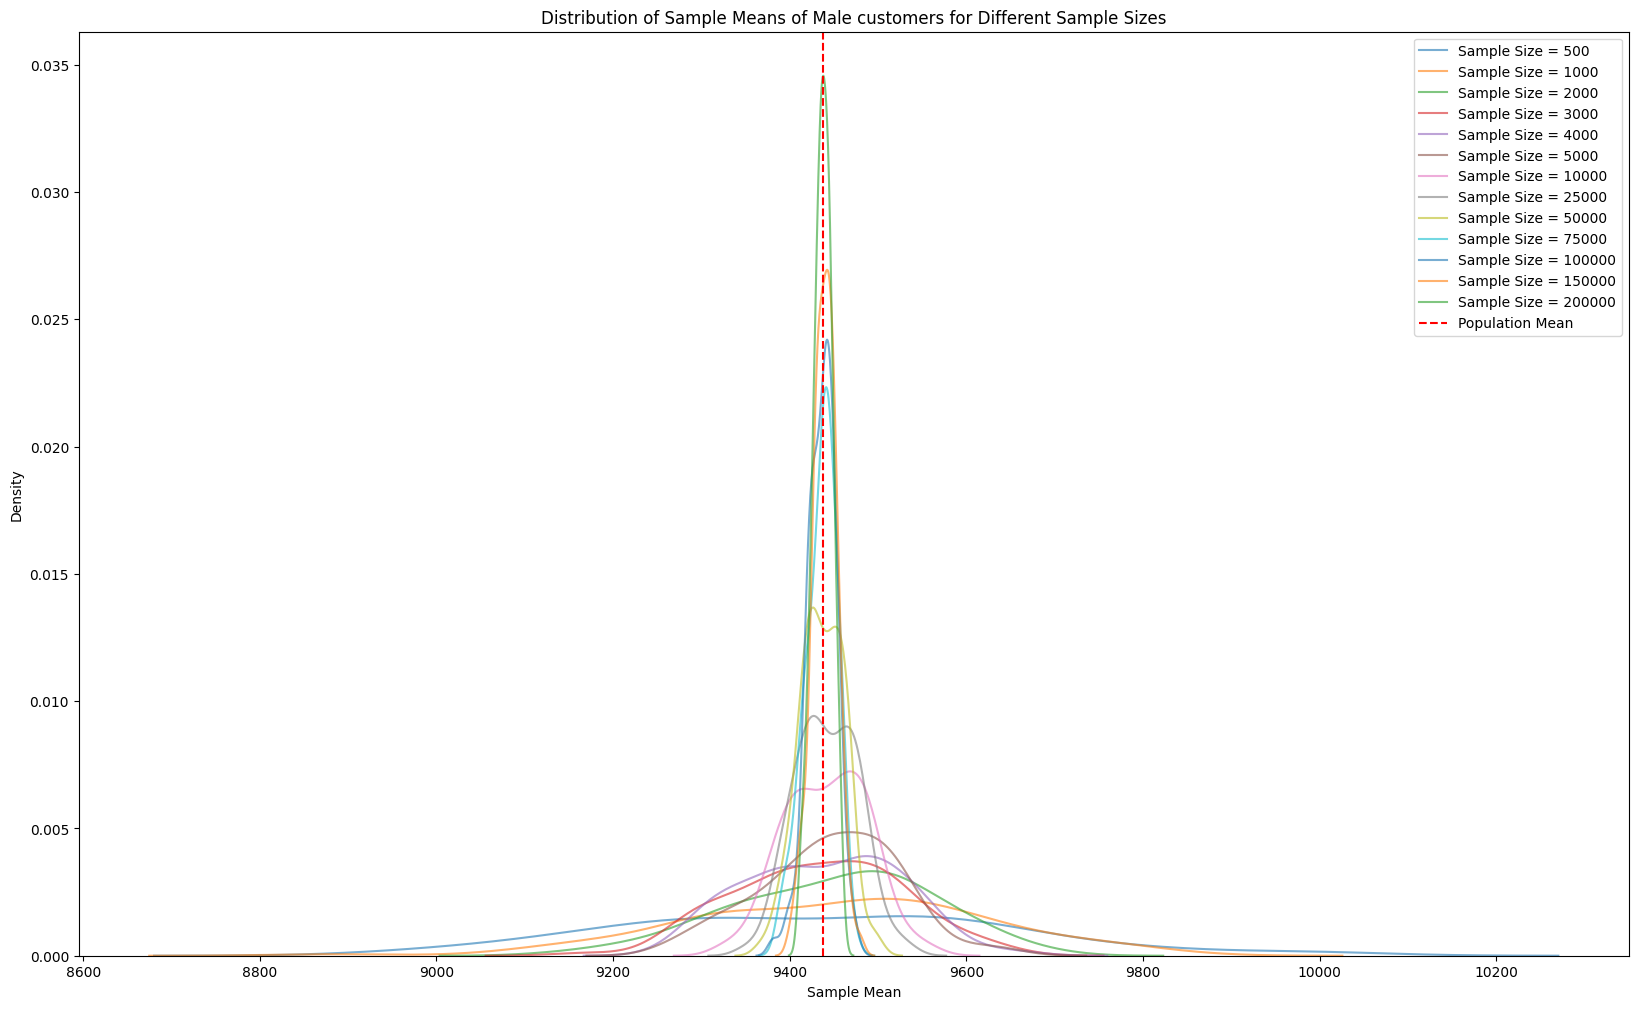

In [ ]:
mean_dist('Gender',['F','M'])

As sample size increases, the spread of the curve decreases.
The distribution of mean values reduces as sample size increases

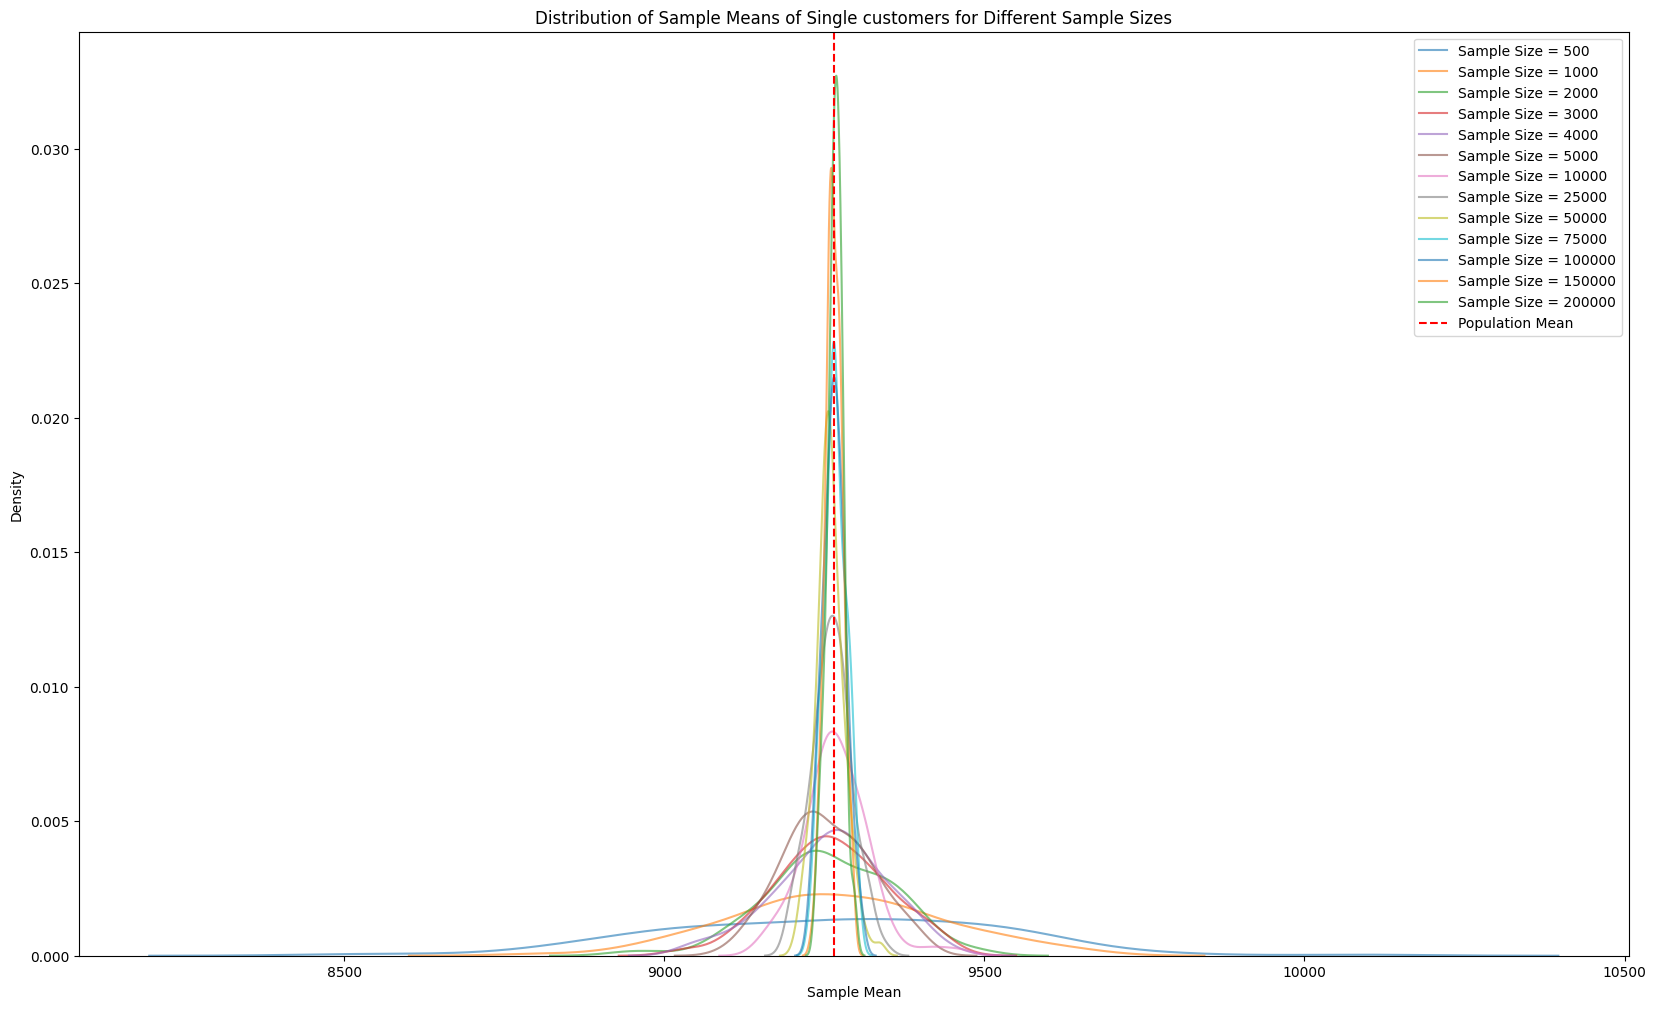

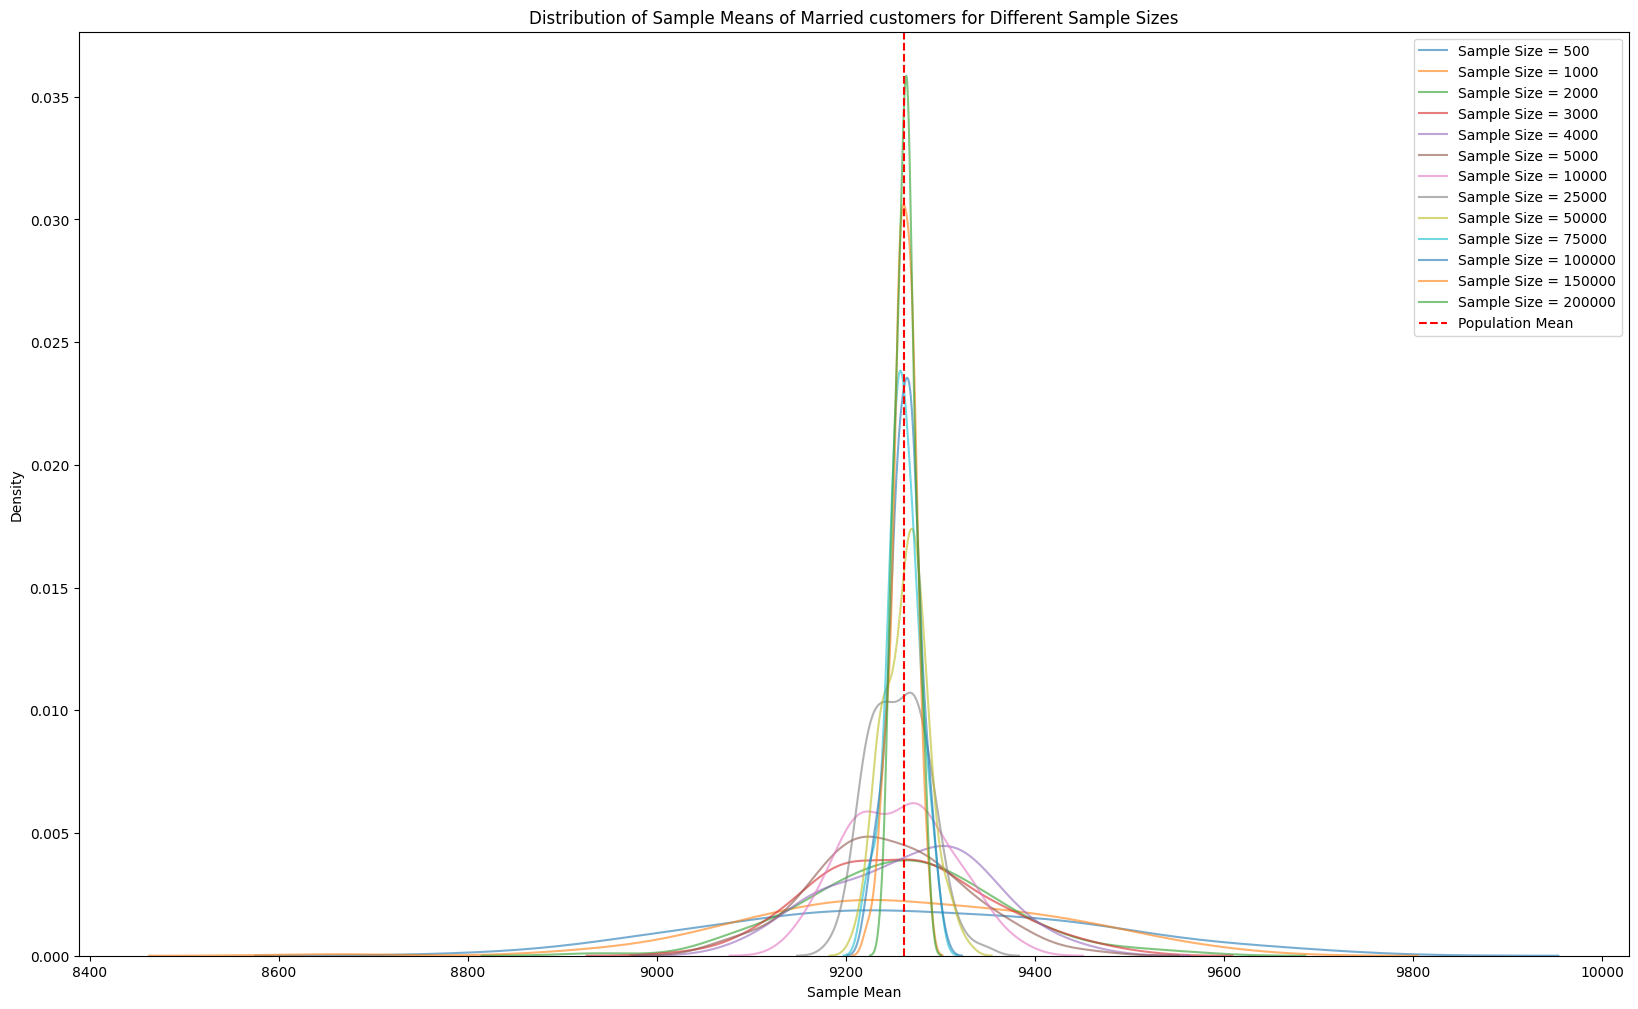

In [ ]:
mean_dist('Marital_Status',[0,1])

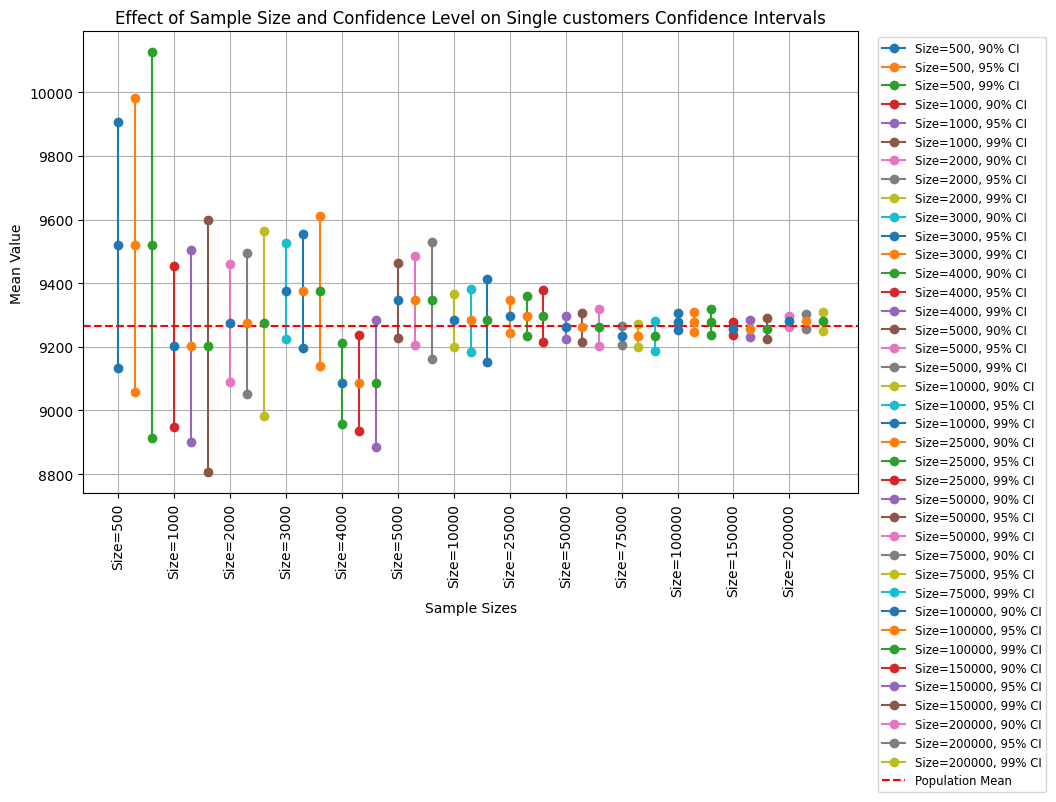

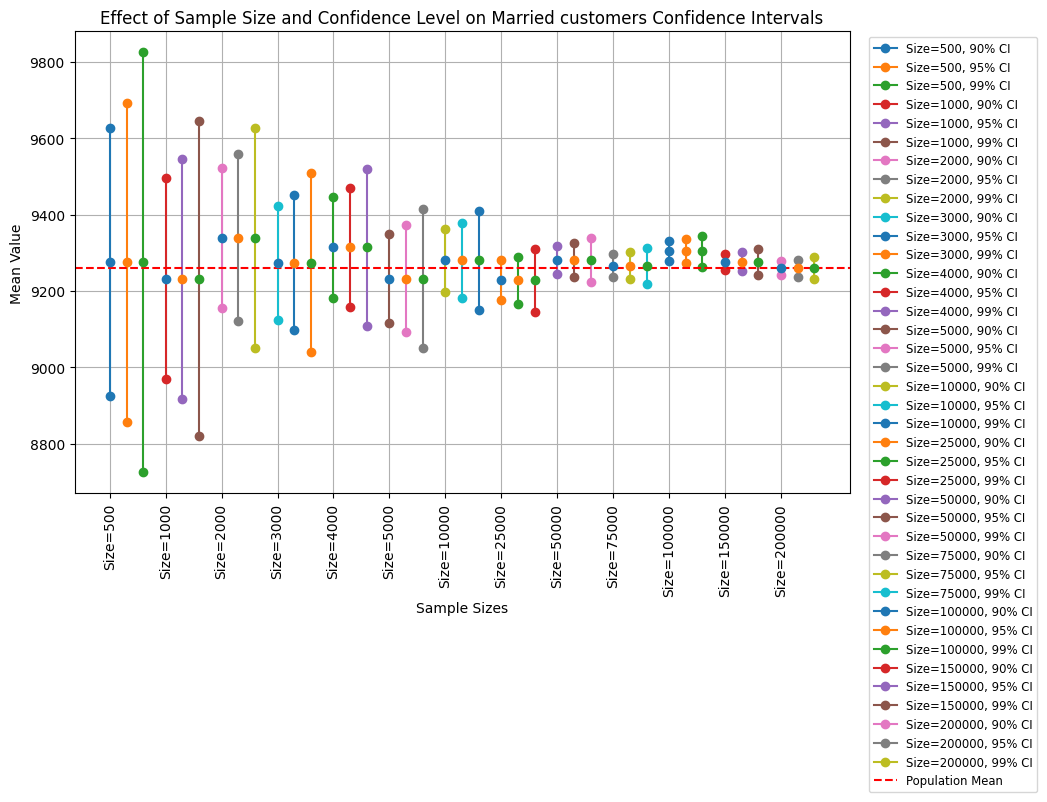

In [ ]:
plot_conf_int('Marital_Status',[0,1])

marital status does not affect the purchasing behaviour of customers as the confidence interval is overlapping


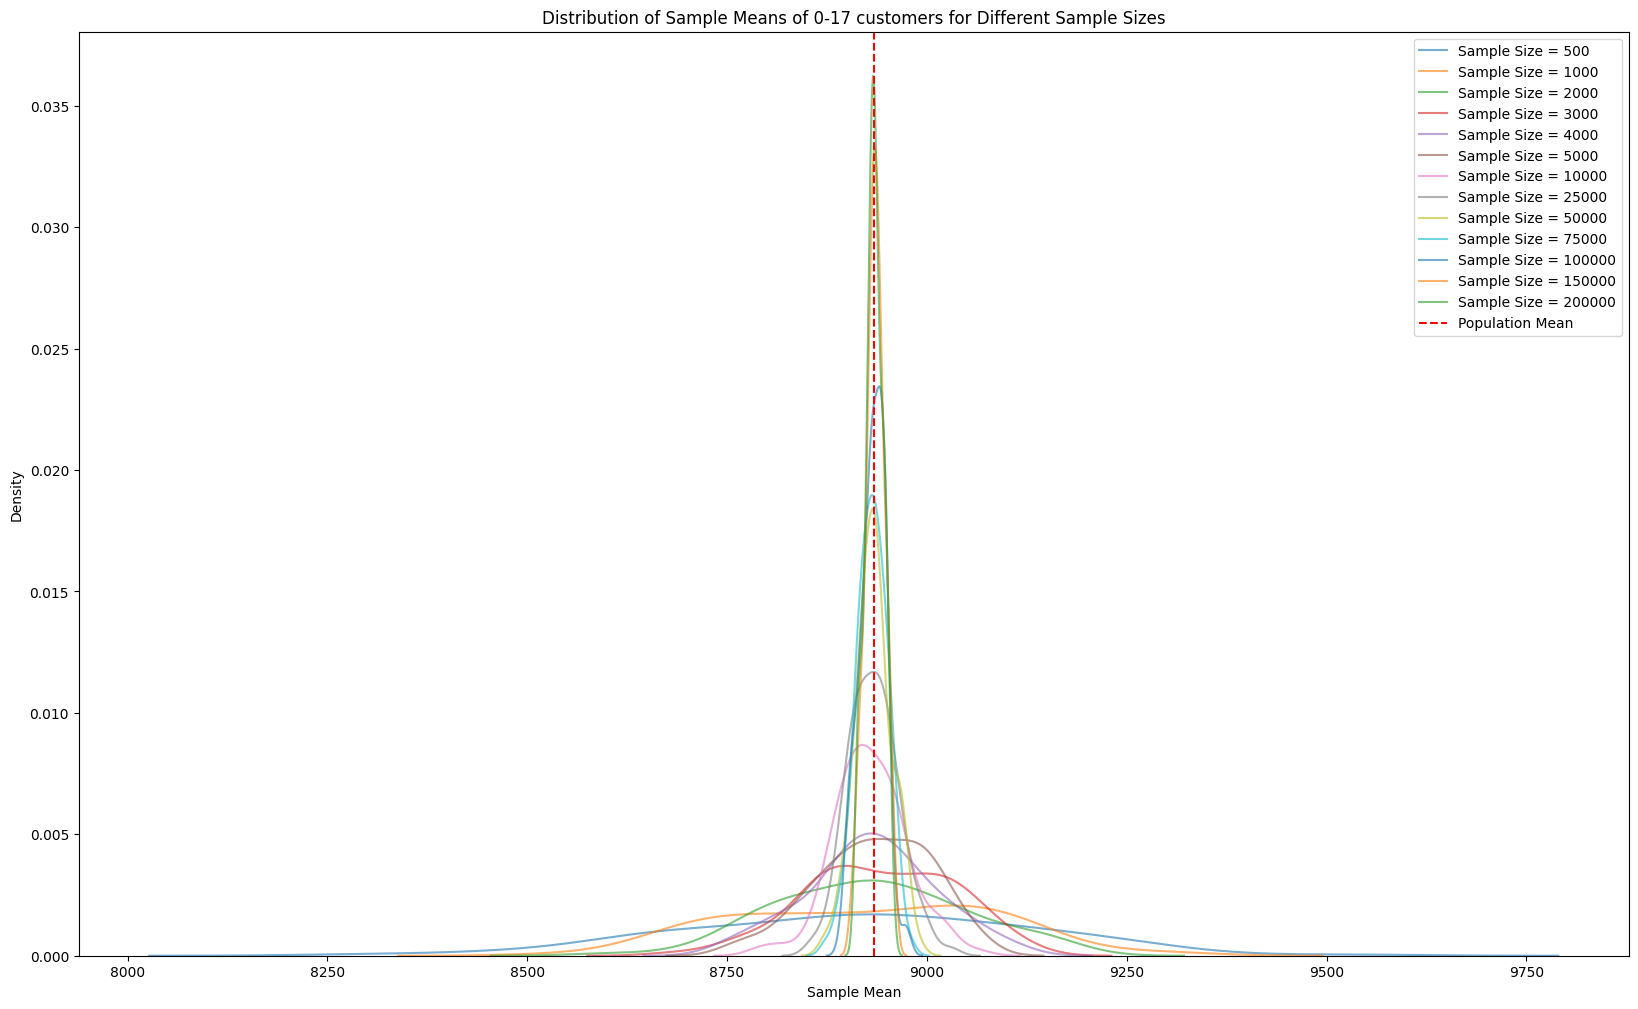

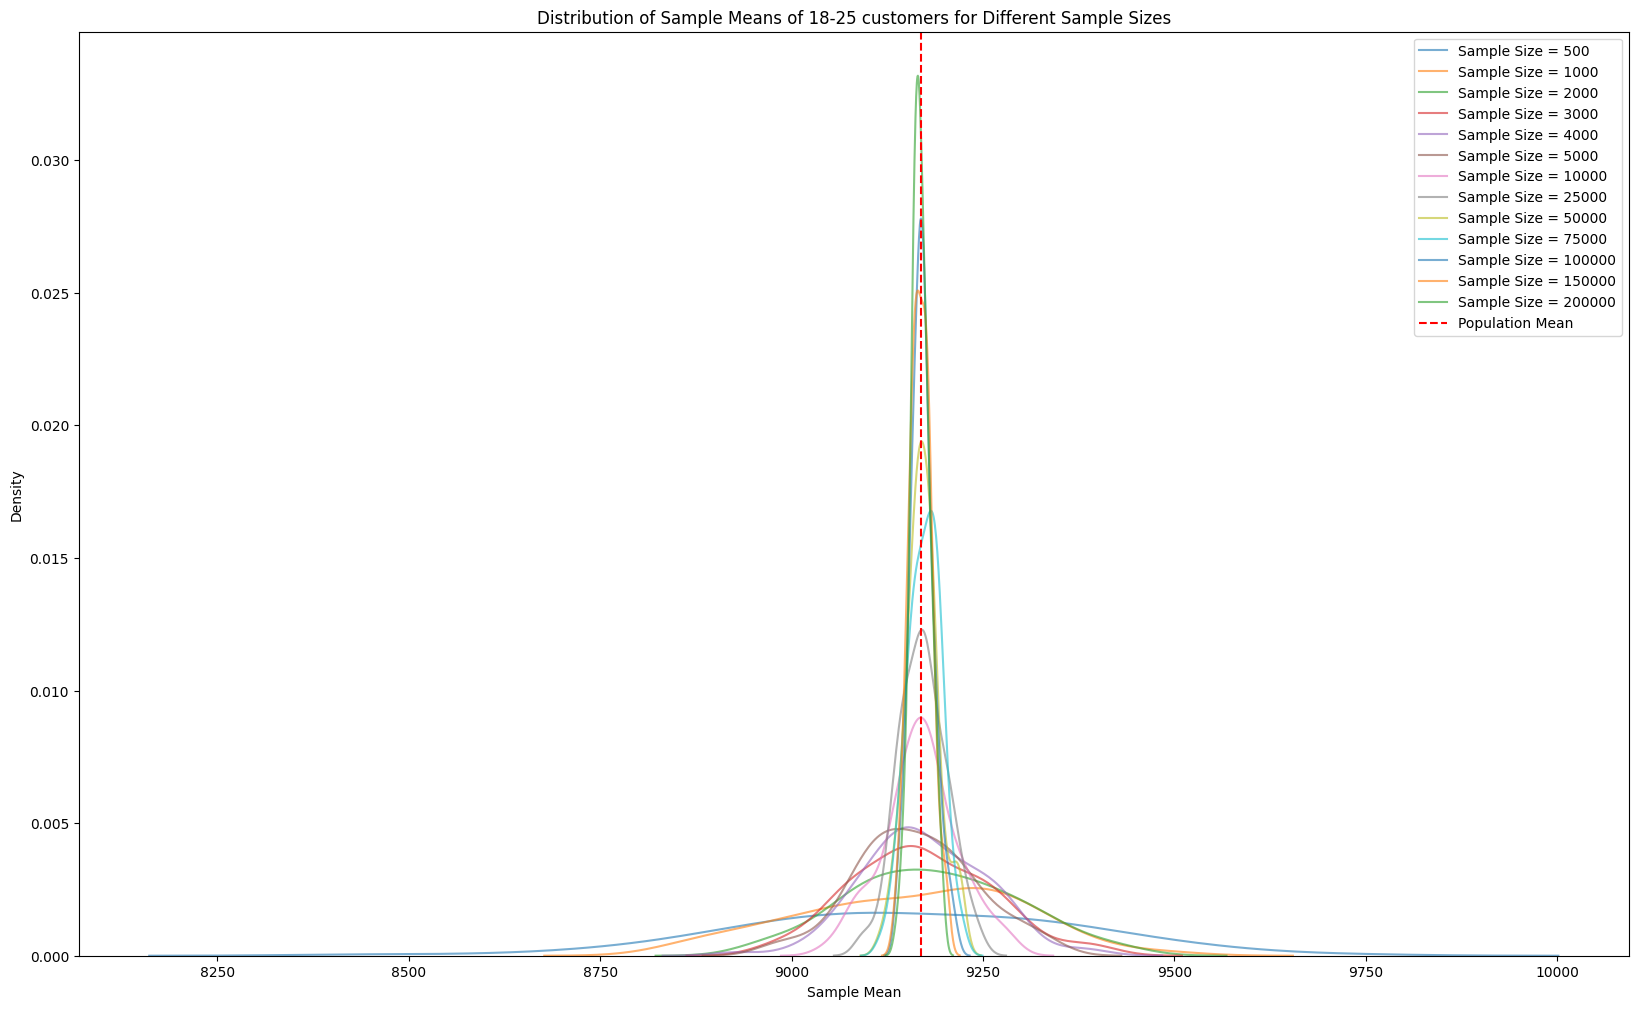

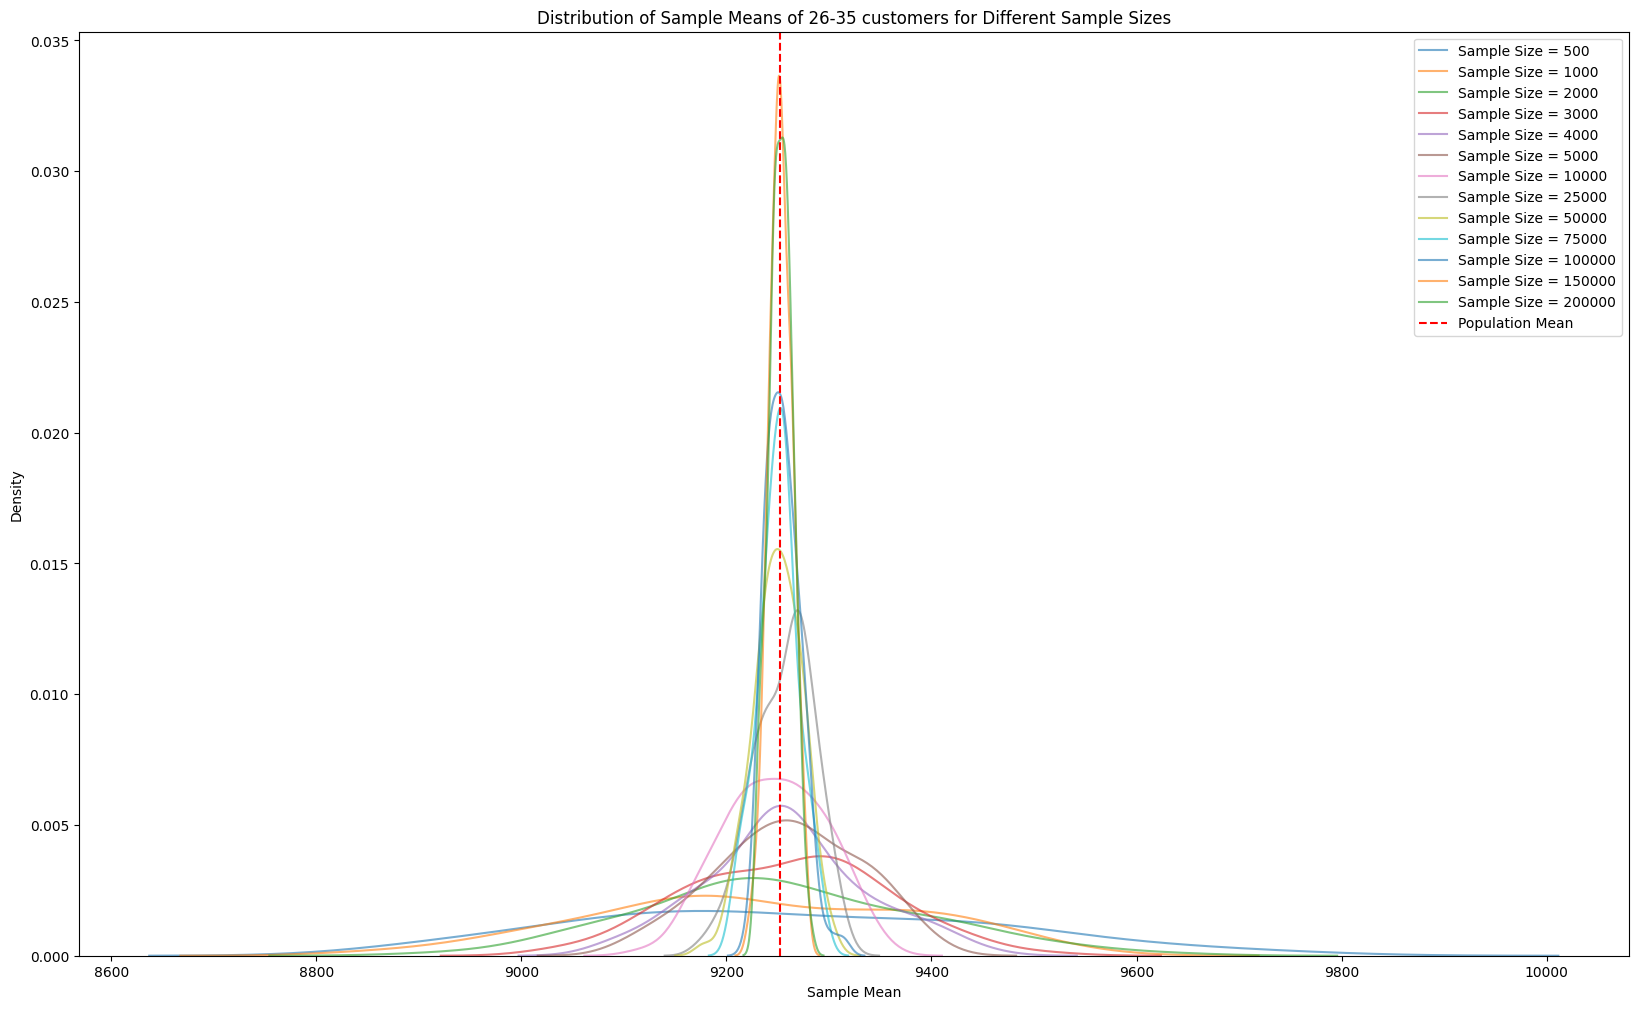

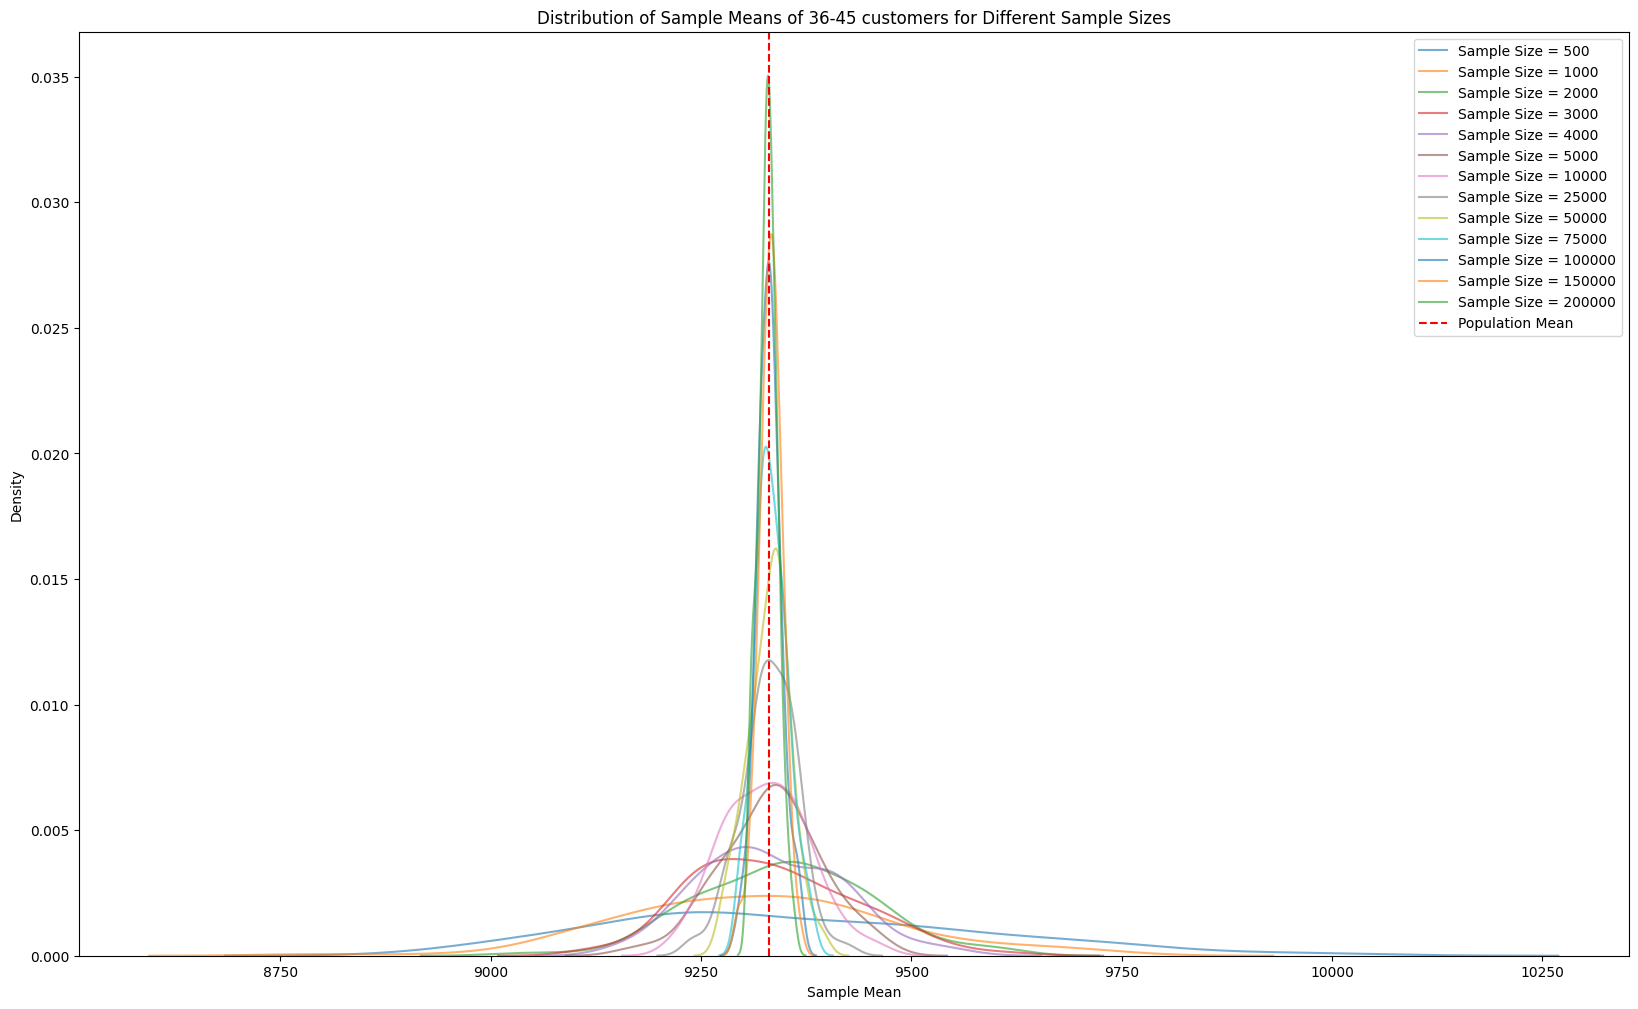

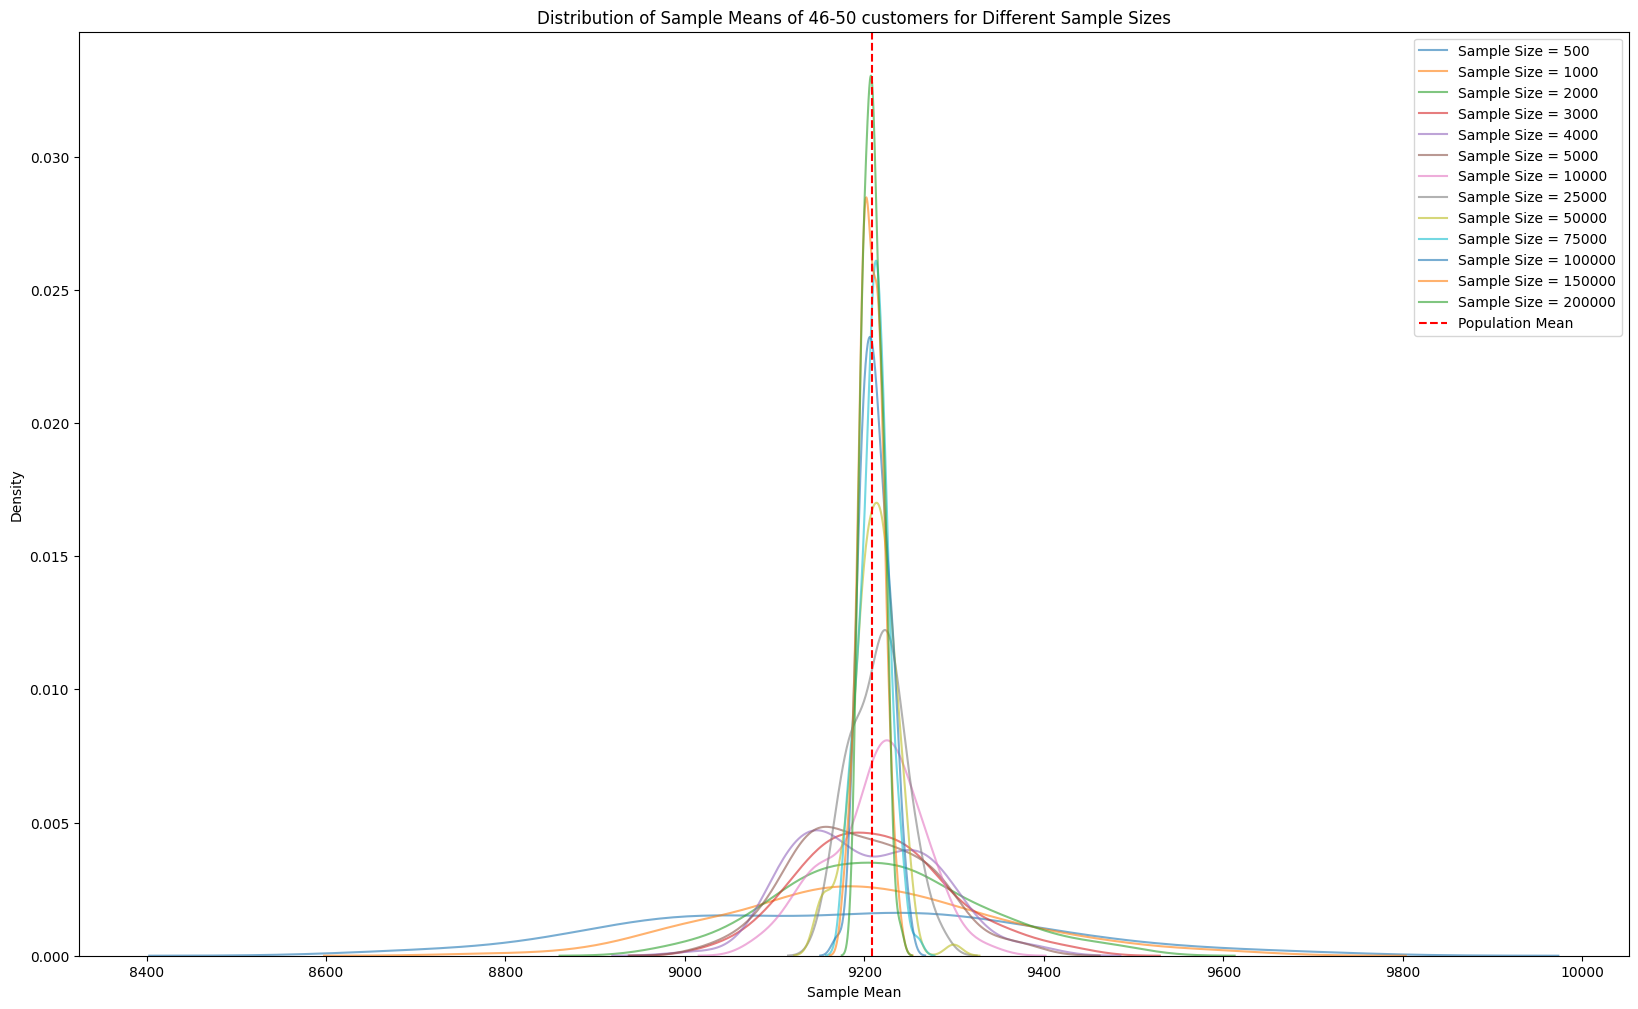

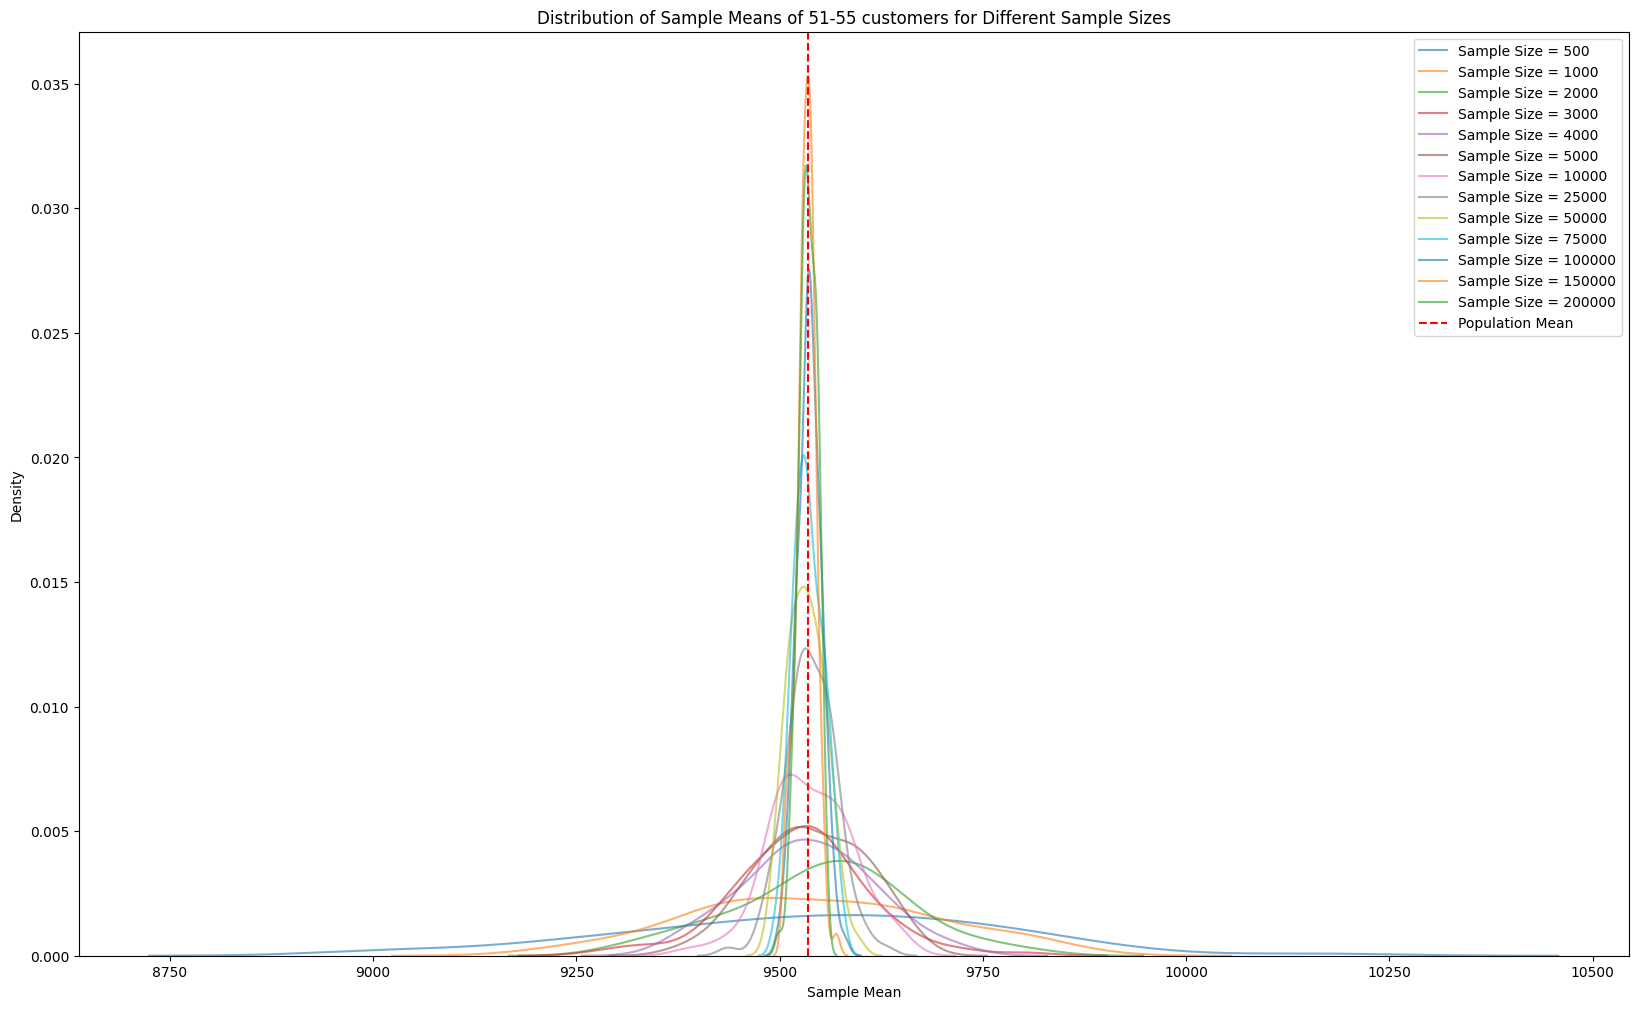

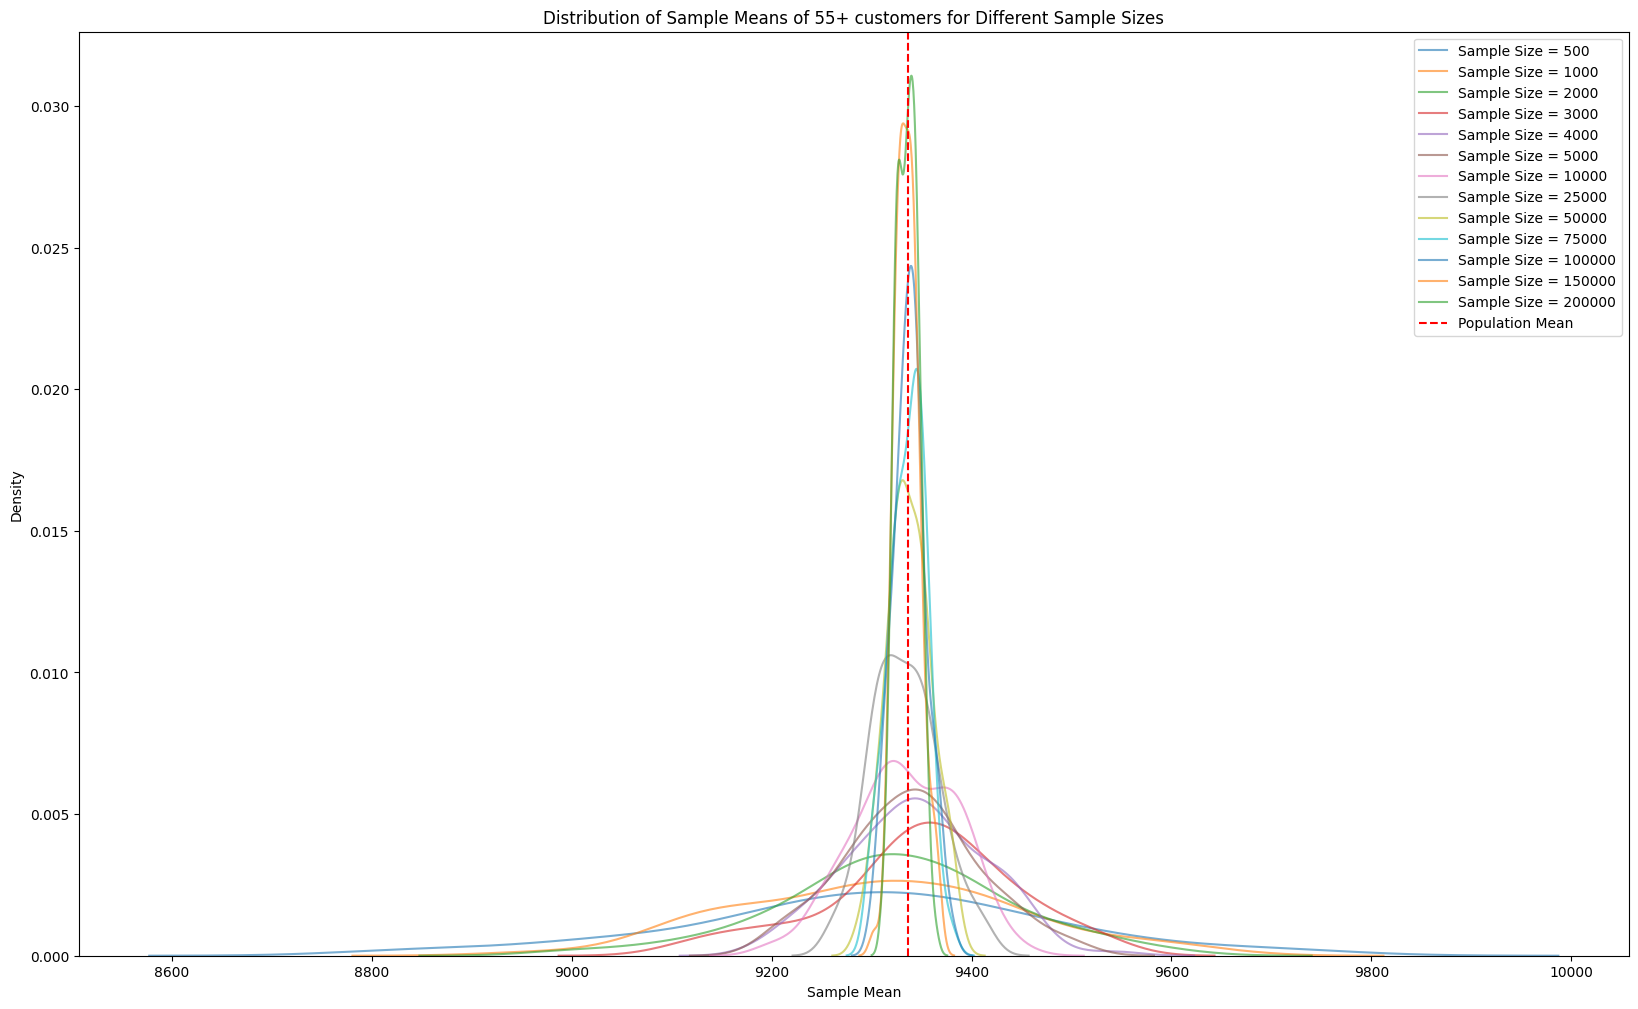

In [ ]:
mean_dist('Age',['0-17','18-25','26-35','36-45','46-50','51-55','55+'])

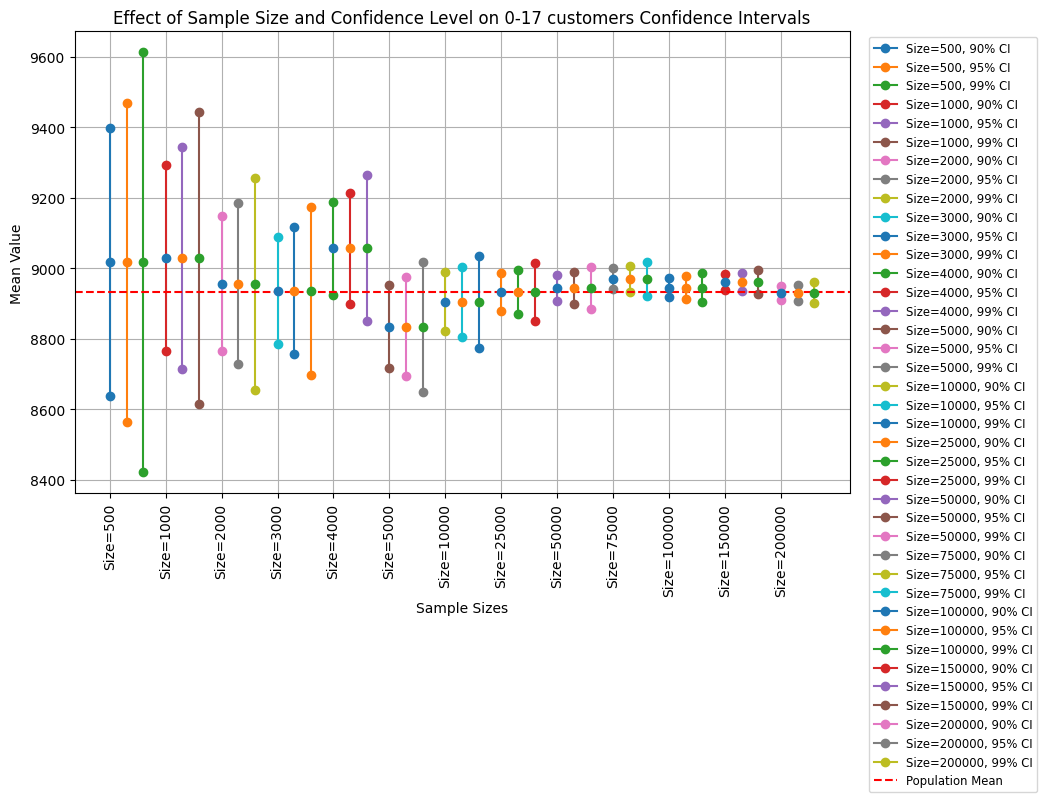

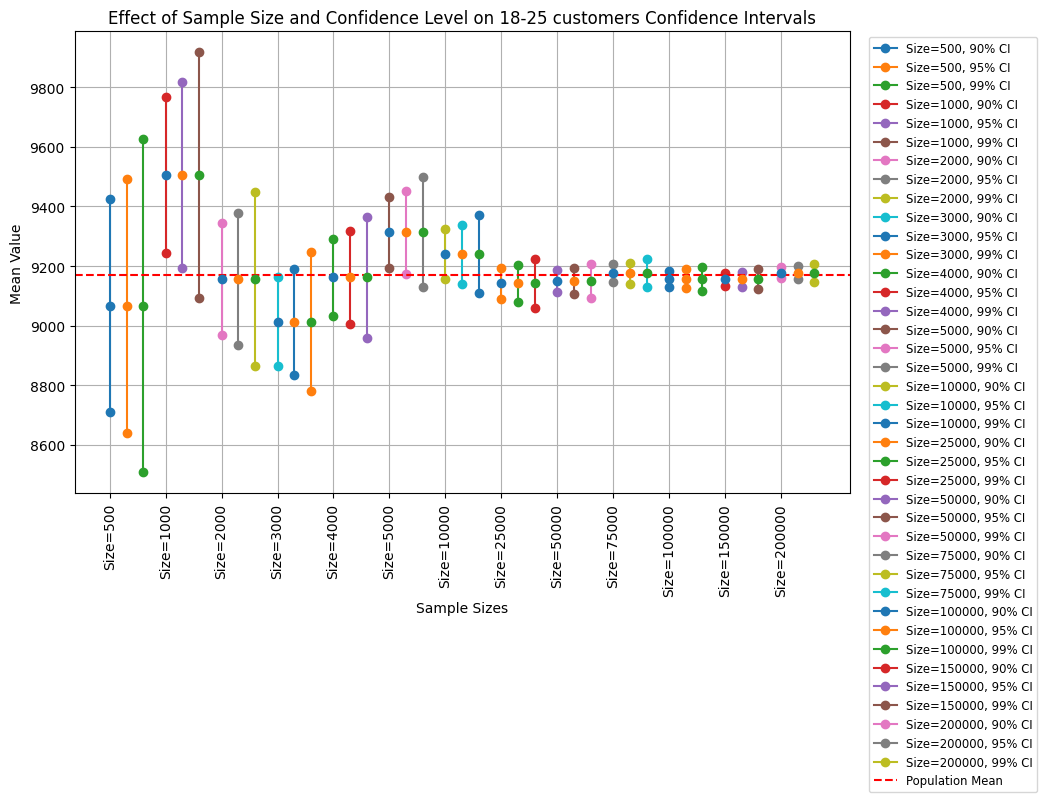

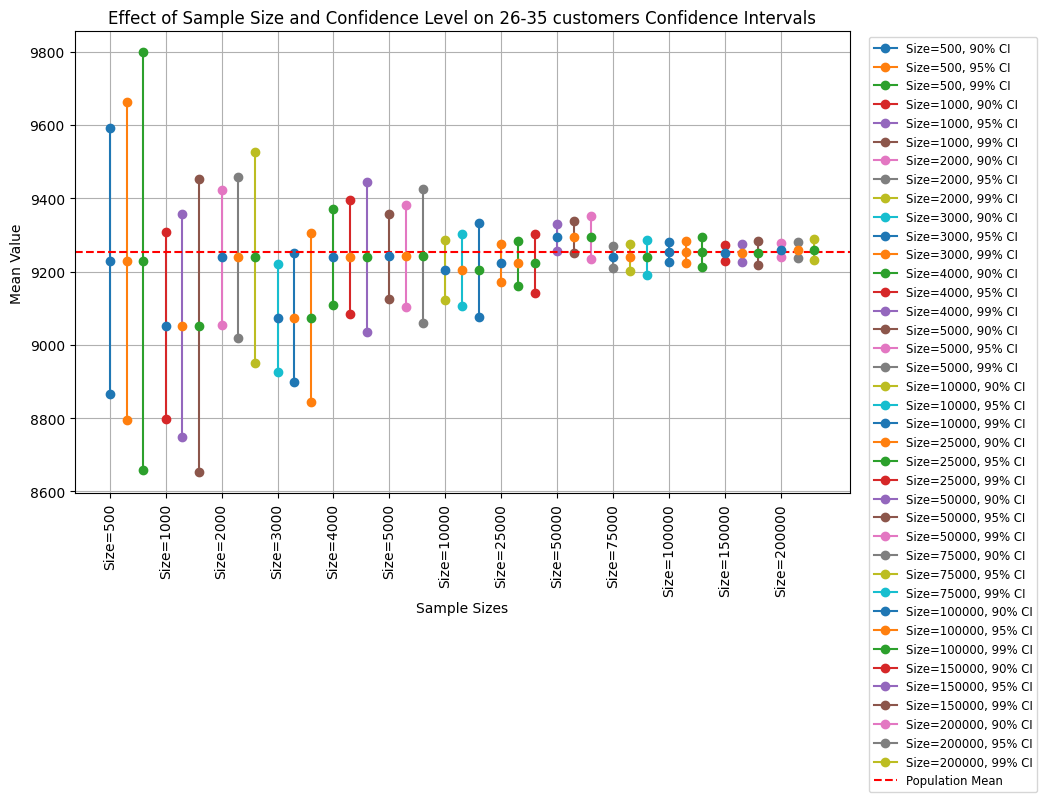

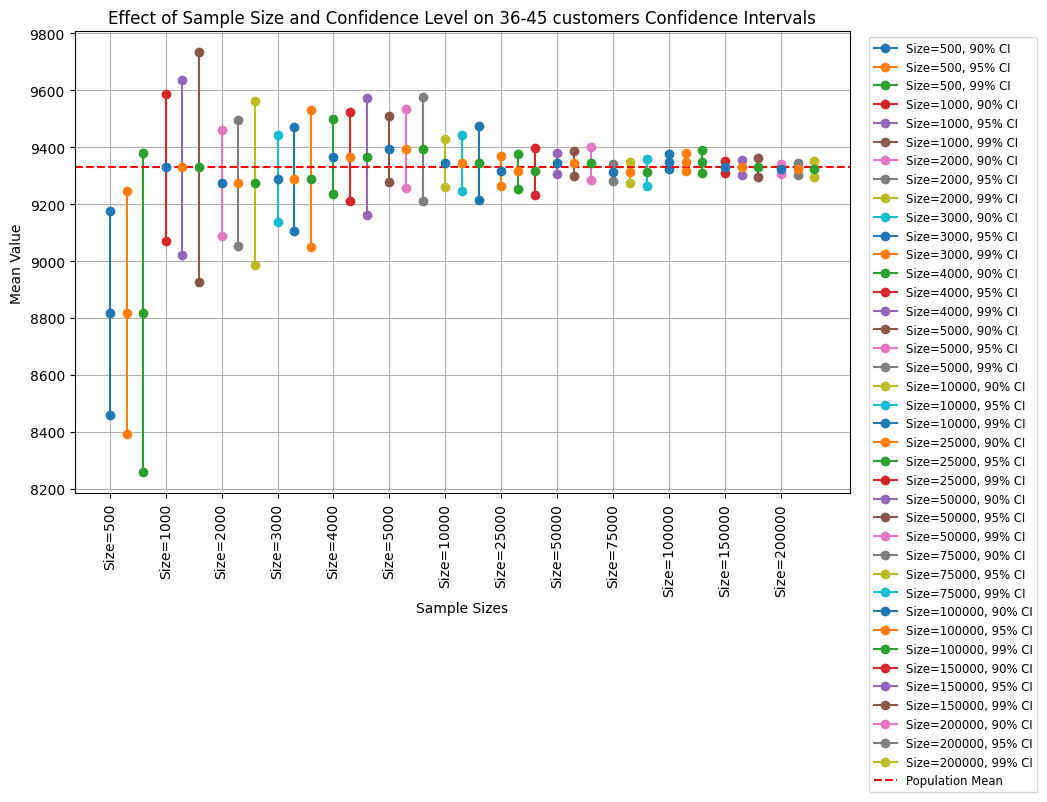

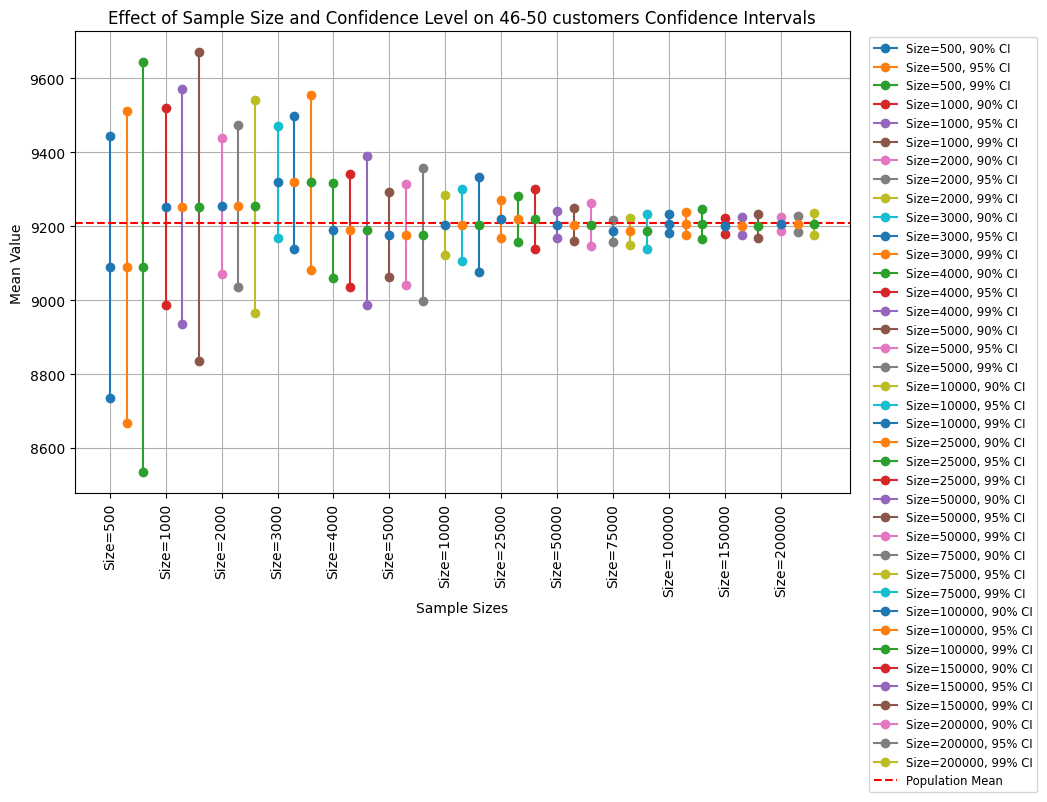

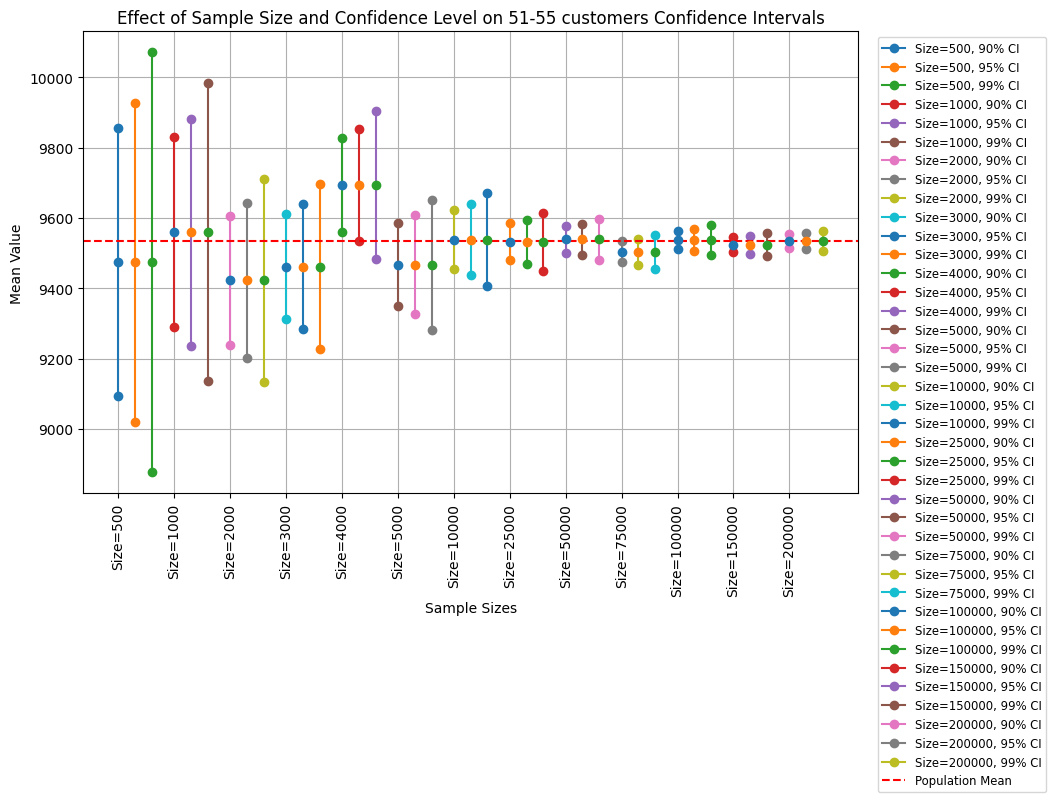

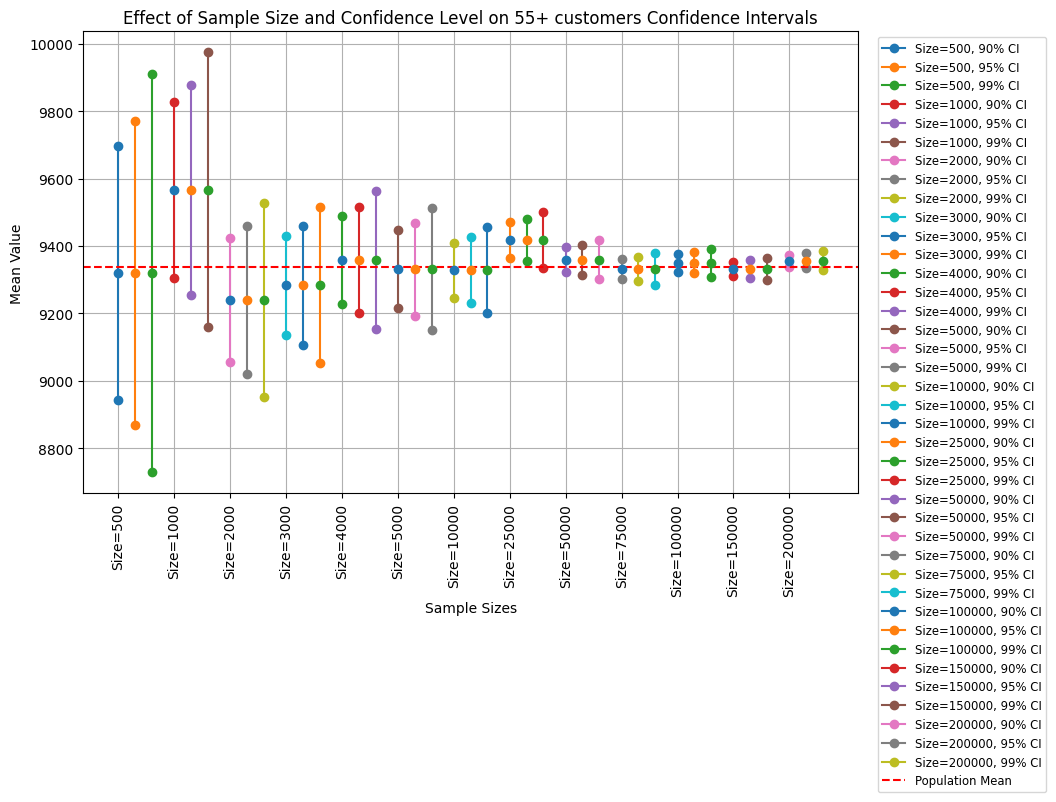

In [ ]:
plot_conf_int('Age',['0-17','18-25','26-35','36-45','46-50','51-55','55+'])

As the age increases, the purchasing amount increases. But for young customers there is very high variance in their purchasing behaviour has shown by larger and swaying confidence intervals for smaller samples.

*   walmert needs to cater to both single and married customers as both are purchasing equally
*   Walmert needs to understand what kinds of products youth purchase in large quantities and sell those for the '0-25' age bracket customers. They can give discounts for those products or do targeted marketing for those products.
*   Walmert also have fair share of middle age and old customers. They also need to cater to their needs. Maybe they can necessary products for those age bracket at the beginning of the store shelves for the customers to have easy shopping experience.
